# Exploratory Data Analysis of ChEMBL Dataset

In [34]:
import polars as pl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import rdkit
import polars.selectors as cs
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Draw
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


print('Libraries imported successfully.')

Libraries imported successfully.


## 1. Load Data

In [35]:
df = pl.read_parquet('processed_data/ChEMBL_processed.parquet')
print('Data loaded successfully.')

Data loaded successfully.


## 2. Initial Data Inspection

In [36]:
df.head()

activity_id,molregno,canonical_smiles,mw_freebase,alogp,hba,hbd,psa,rtb,aromatic_rings,qed_weighted,standard_value,standard_units,standard_type,standard_relation,pchembl_value,target_chembl_id,target_name,confidence_score,pIC50
i64,i64,str,f64,f64,i64,i64,f64,i64,i64,f64,f64,str,str,str,f64,str,str,i64,f64
4119222,961254,"""Cc1ccc(N2C(=O)CC(Sc3cccs3)C2=O…",303.41,3.48,4,0,37.38,3,2,0.81,2238.7,"""nM""","""Potency""","""=""",5.65,"""CHEMBL3577""","""Aldehyde dehydrogenase 1A1""",9,5.650004
2669244,556566,"""O=C(CC1(CC(=O)NC2C3CC4CC(C3)CC…",408.59,4.58,2,2,58.2,7,1,0.69,19.0,"""nM""","""IC50""","""=""",7.72,"""CHEMBL4235""","""11-beta-hydroxysteroid dehydro…",9,7.721246
4559012,952361,"""Cc1cccc(C)c1NC(=O)C1(N(Cc2ccco…",466.54,3.16,5,3,120.75,7,2,0.54,39810.7,"""nM""","""Potency""","""=""",4.4,"""CHEMBL2093861""","""Menin/Histone-lysine N-methylt…",5,4.4
2330405,462649,"""CC(=O)OC/C(=C\CC/C(C)=C/CC/C(C…",452.64,7.09,4,0,60.44,13,0,0.17,38100.0,"""nM""","""IC50""","""=""",4.42,"""CHEMBL395""","""HepG2""",1,4.419075
11852930,807029,"""O=C(NC1CCCC1)C(c1ccc(Cl)cc1)N(…",404.92,3.6,5,1,75.19,6,2,0.8,47754.8,"""nM""","""Potency""",null,null,"""CHEMBL2288""","""Peptidyl-prolyl cis-trans isom…",8,4.320983


In [37]:
df.describe()

statistic,activity_id,molregno,canonical_smiles,mw_freebase,alogp,hba,hbd,psa,rtb,aromatic_rings,qed_weighted,standard_value,standard_units,standard_type,standard_relation,pchembl_value,target_chembl_id,target_name,confidence_score,pIC50
str,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,f64,str,str,f64,f64
"""count""",1.698981e6,1.698981e6,"""1698981""",1.698981e6,1.664902e6,1.664902e6,1.664902e6,1.664902e6,1.664902e6,1.664902e6,1.664902e6,1.698981e6,"""1698981""","""1698981""","""1456814""",1.143723e6,"""1698981""","""1698981""",1.698981e6,1.698981e6
"""null_count""",0.0,0.0,"""0""",0.0,34079.0,34079.0,34079.0,34079.0,34079.0,34079.0,34079.0,0.0,"""0""","""0""","""242167""",555258.0,"""0""","""0""",0.0,0.0
"""mean""",1.3856e7,1.6977e6,null,447.956052,3.671738,5.634811,1.626955,86.758145,5.806219,2.765829,0.528774,3.5621e14,null,null,null,6.495037,null,null,7.286049,NaN
"""std""",9.6145e6,986526.666624,null,237.732444,1.717318,2.331726,1.375053,39.231299,3.320696,1.181542,0.207296,4.5177e17,null,null,null,1.470652,null,null,2.892888,NaN
"""min""",31863.0,23.0,"""B.CC(=O)OC1CN2CCC1CC2""",6.94,-13.05,0.0,0.0,0.0,0.0,0.0,0.01,-100000.0,"""nM""","""% inhibition""","""<""",2.0,"""CHEMBL1075092""","""1,25-dihydroxyvitamin D(3) 24-…",0.0,-11.77
"""25%""",4.525862e6,856365.0,null,349.43,2.64,4.0,1.0,61.44,4.0,2.0,0.38,51.5,null,null,null,5.21,null,null,8.0,4.73639
"""50%""",1.4243723e7,1.606666e6,null,418.46,3.64,5.0,1.0,82.45,5.0,3.0,0.53,1200.0,null,null,null,6.43,null,null,9.0,5.920819
"""75%""",2.3176647e7,2.53674e6,null,492.7,4.68,7.0,2.0,105.82,7.0,4.0,0.69,18348.9,null,null,null,7.6,null,null,9.0,7.288193
"""max""",2.9054096e7,3.283448e6,"""n1onc2c1NC1Nc3nonc3NC1N2""",10188.53,19.39,32.0,25.0,595.22,59.0,17.0,0.95,5.8884e20,"""nM""","""selectivity""","""~""",14.92,"""CHEMBL6195""","""von Hippel-Lindau disease tumo…",9.0,18.585027


### **I. Wstępna eksploracja**

**1. Załadowanie i dane**

* **Wolumen danych:** Dataset jest ogromny, zawiera aż **1 698 981 wierszy** i **20 kolumn**.
* **Struktura:** Dane zawierają identyfikatory molekuł (`molregno`, `canonical_smiles`), własności fizykochemiczne (`mw_freebase`, `alogp`, `psa`) oraz dane o bioaktywności (`standard_value`, `pIC50`).

**2. Statystyki i obserwacje (.describe())**

* **Wartości ekstremalne:** Kolumna `standard_value` (stężenie/aktywność) ma absurdalnie wysoką wartość maksymalną (**5.88e20**), co wskazuje na błędy pomiarowe lub jednostkowe (np. brak konwersji jednostek).
* **Rozkład:** Średnia masa cząsteczkowa (`mw_freebase`) wynosi ok. 448 Da, co jest typowe dla leków (reguła Lipińskiego).
* **Brakujące średnie:** Dla kolumny `pIC50` średnia i odchylenie standardowe wynoszą `NaN`, mimo że `null_count` wynosi 0. Sugeruje to obecność wartości nieskończonych (`inf`) lub błędów matematycznych przy obliczeniach.

/tmp/ipykernel_73857/615380879.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=null_data, x="Cecha", y="Liczba_Nulli", palette="viridis")


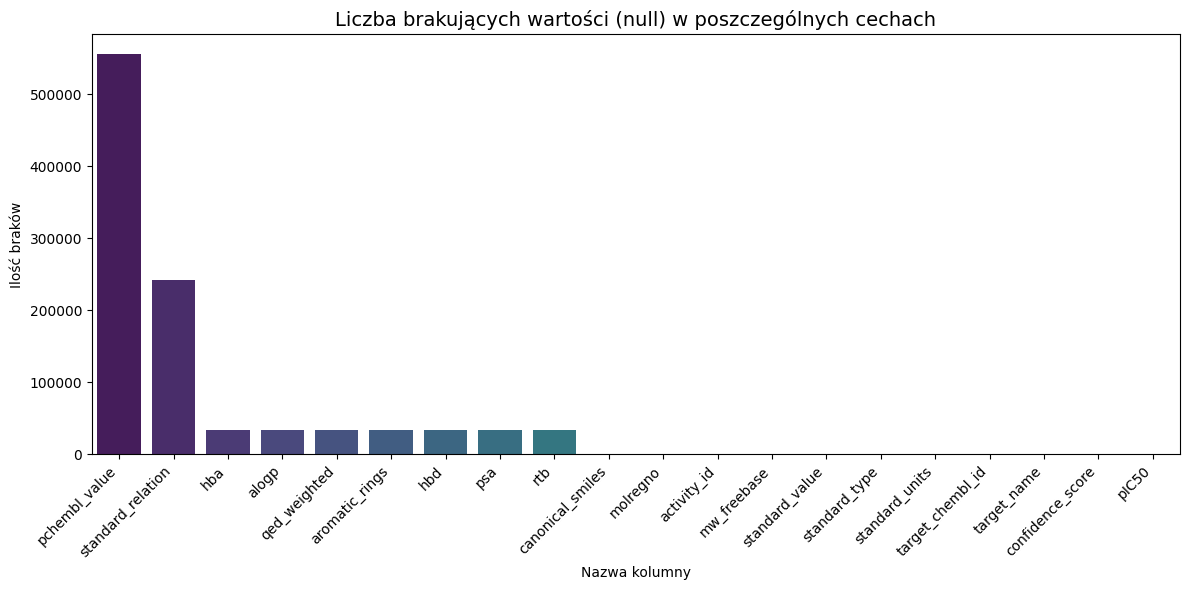

In [38]:
# 1. Obliczamy liczbę nulli dla każdej kolumny i zamieniamy na format długi (long)
null_data = df.null_count().to_pandas().melt(var_name="Cecha", value_name="Liczba_Nulli")

# 2. Sortujemy dane, aby wykres był czytelny
null_data = null_data.sort_values(by="Liczba_Nulli", ascending=False)

# 3. Tworzymy wykres
plt.figure(figsize=(12, 6))
sns.barplot(data=null_data, x="Cecha", y="Liczba_Nulli", palette="viridis")

# 4. Formatowanie wykresu
plt.title("Liczba brakujących wartości (null) w poszczególnych cechach", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Nazwa kolumny")
plt.ylabel("Ilość braków")
plt.tight_layout()
plt.show()

**3. Braki danych i anomalie**

* **Kluczowe braki:**
    * `pchembl_value`: Ponad **555 000 braków**. W związku z tym dokonano wyliczenia pIC50 manualnie.
    * `standard_relation`: Ponad **242 000 braków**.
    * Cechy fizykochemiczne (`alogp`, `hba`, `hbd`): ok. 34 000 braków (ok. 2% danych).

Statystyki pIC50 Value:
shape: (9, 2)
┌────────────┬────────────┐
│ statistic  ┆ pIC50      │
│ ---        ┆ ---        │
│ str        ┆ f64        │
╞════════════╪════════════╡
│ count      ┆ 1.698981e6 │
│ null_count ┆ 0.0        │
│ mean       ┆ NaN        │
│ std        ┆ NaN        │
│ min        ┆ -11.77     │
│ 25%        ┆ 4.73639    │
│ 50%        ┆ 5.920819   │
│ 75%        ┆ 7.288193   │
│ max        ┆ 18.585027  │
└────────────┴────────────┘


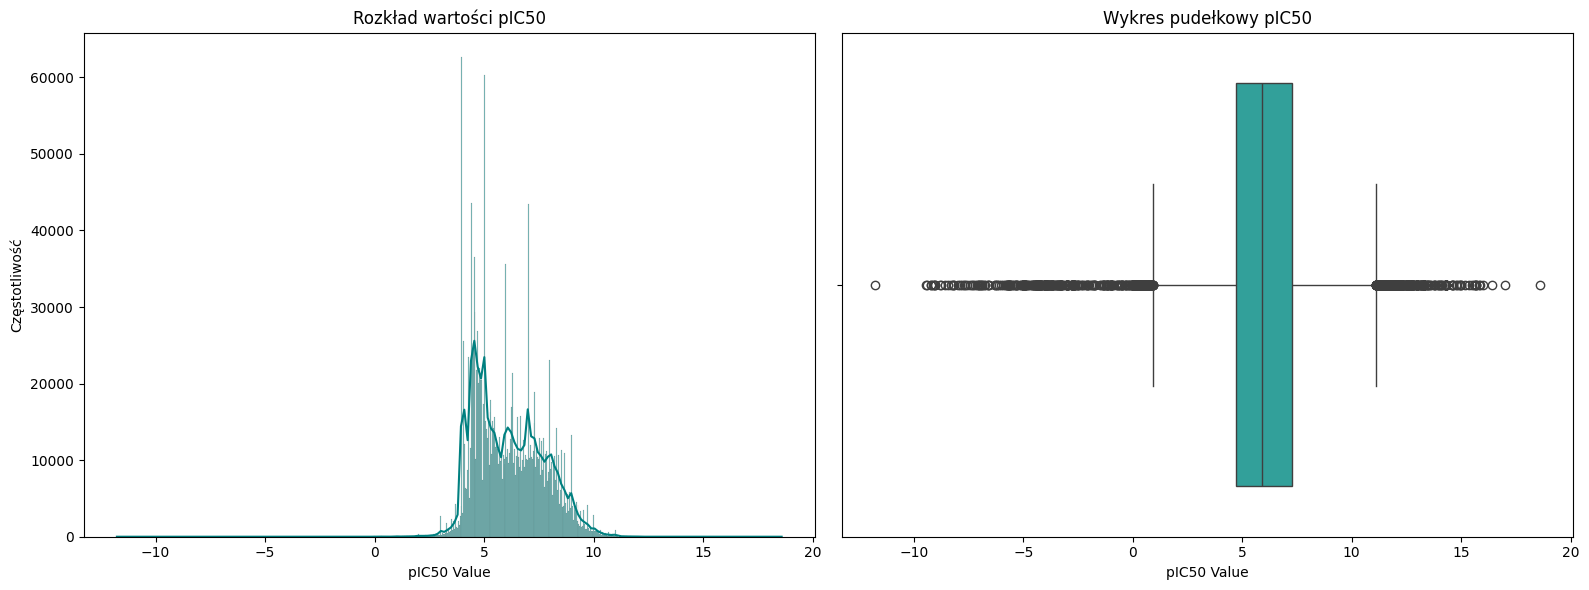

In [ ]:
# Analiza rozkładu aktywności (pIC50 Value)

# 1. Przygotowanie danych (usunięcie brakujących wartości)
activity_df = df.select("pIC50").drop_nulls()

# 2. Statystyki opisowe
print("Statystyki pIC50 Value:")
print(activity_df.describe())

# 3. Wizualizacja
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Histogram i krzywa KDE
sns.histplot(activity_df.to_pandas(), x="pIC50", kde=True, ax=ax[0], color='teal')
ax[0].set_title('Rozkład wartości pIC50')
ax[0].set_xlabel('pIC50 Value')
ax[0].set_ylabel('Częstotliwość')

# Boxplot (do wykrycia wartości odstających)
sns.boxplot(data=activity_df.to_pandas(), x="pIC50", ax=ax[1], color='lightseagreen')
ax[1].set_title('Wykres pudełkowy pIC50')
ax[1].set_xlabel('pIC50 Value')

plt.tight_layout()
plt.show()

## 3. Correlation Analysis

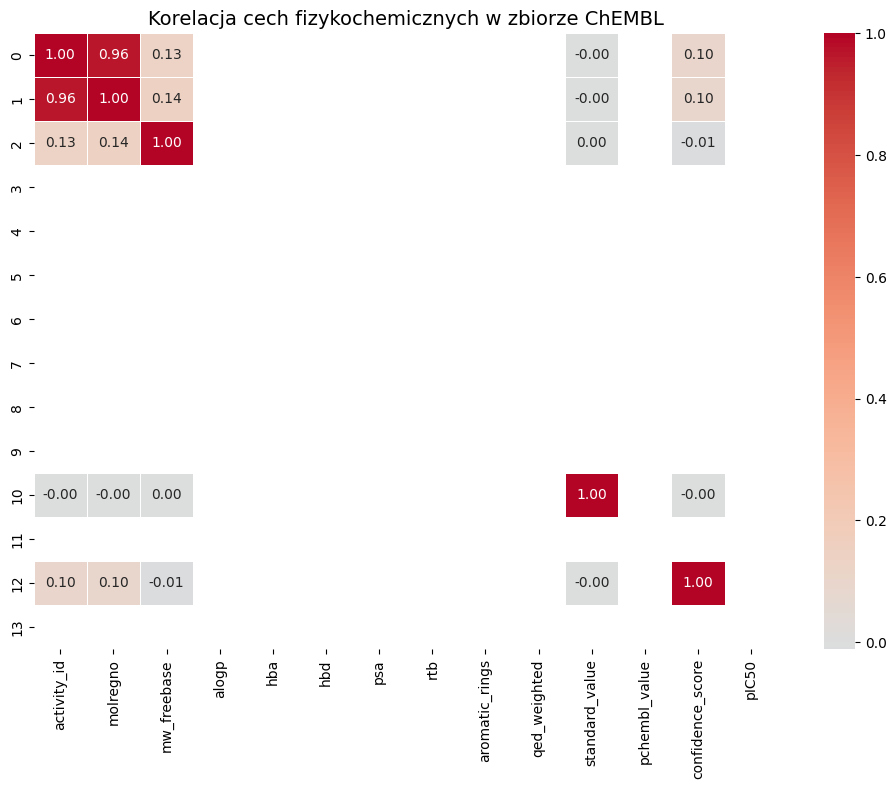

In [40]:
# Macierz korelacji cech fizykochemicznych

# 1. Wybór cech numerycznych (MW, LogP, HBA, HBD, PSA itp.)
numeric_cols = df.select(cs.numeric())

# 2. Obliczenie macierzy korelacji
corr_matrix = numeric_cols.corr()

# 3. Wizualizacja za pomocą Heatmapy
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix.to_pandas(), 
    annot=True,          # Wyświetla wartości korelacji
    fmt=".2f",           # Zaokrąglenie do 2 miejsc po przecinku
    cmap="coolwarm",     # Kolory: czerwony (dodatnia), niebieski (ujemna)
    center=0,            # Punkt środkowy skali
    linewidths=0.5
)

plt.title("Korelacja cech fizykochemicznych w zbiorze ChEMBL", fontsize=14)
plt.show()

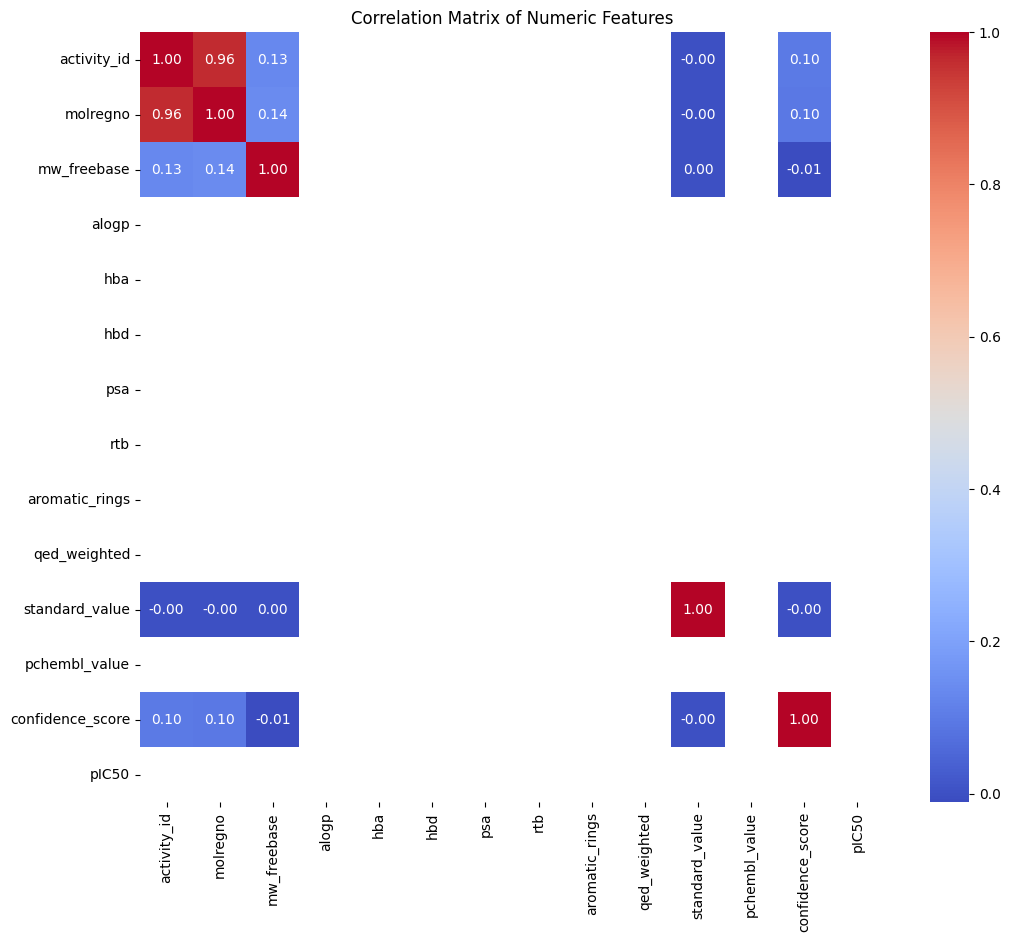

In [41]:
# 1. Wybierz tylko kolumny numeryczne za pomocą selektora
numeric_df = df.select(cs.numeric())

# 2. Oblicz macierz korelacji
corr_matrix = numeric_df.corr()

# 3. Wyświetl heatmapę (Seaborn najlepiej współpracuje z formatem Pandas, więc tu robimy szybką konwersję)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix.to_pandas(), annot=True, fmt='.2f', cmap='coolwarm', 
            xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

## Analiza celów biologicznych

/tmp/ipykernel_73857/1357889235.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


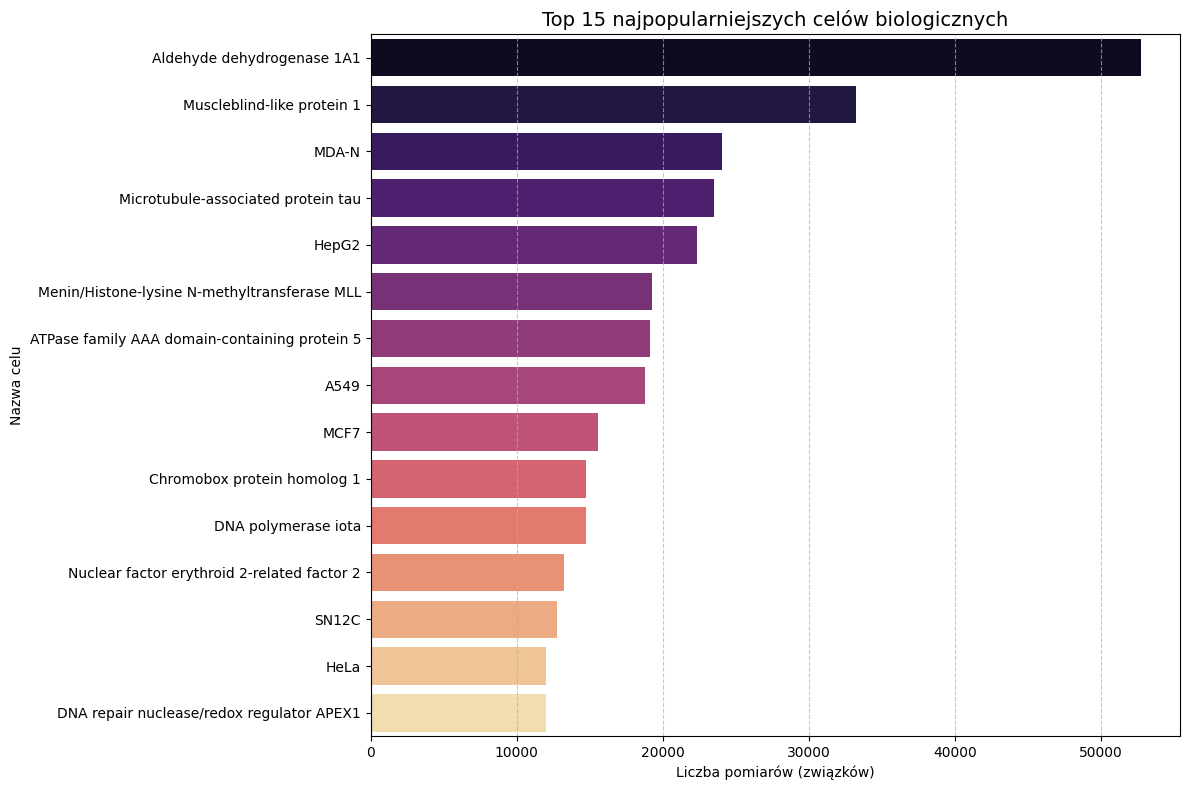

In [42]:
# Analiza najpopularniejszych celów biologicznych (Targets) - POPRAWIONA

# 1. Zliczenie wystąpień każdego celu
# Używamy 'target_name' zamiast 'target_pref_name' 
# oraz 'molregno' do zliczania (zamiast nieobecnego molecule_chembl_id)
target_counts = (
    df.group_by("target_name")
    .agg(pl.count("molregno").alias("count"))
    .sort("count", descending=True)
    .head(15) 
)

# 2. Wizualizacja
plt.figure(figsize=(12, 8))
sns.barplot(
    data=target_counts.to_pandas(), 
    y="target_name", 
    x="count", 
    palette="magma"
)

plt.title("Top 15 najpopularniejszych celów biologicznych", fontsize=14)
plt.xlabel("Liczba pomiarów (związków)")
plt.ylabel("Nazwa celu")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Wizualizacja struktur chemicznych

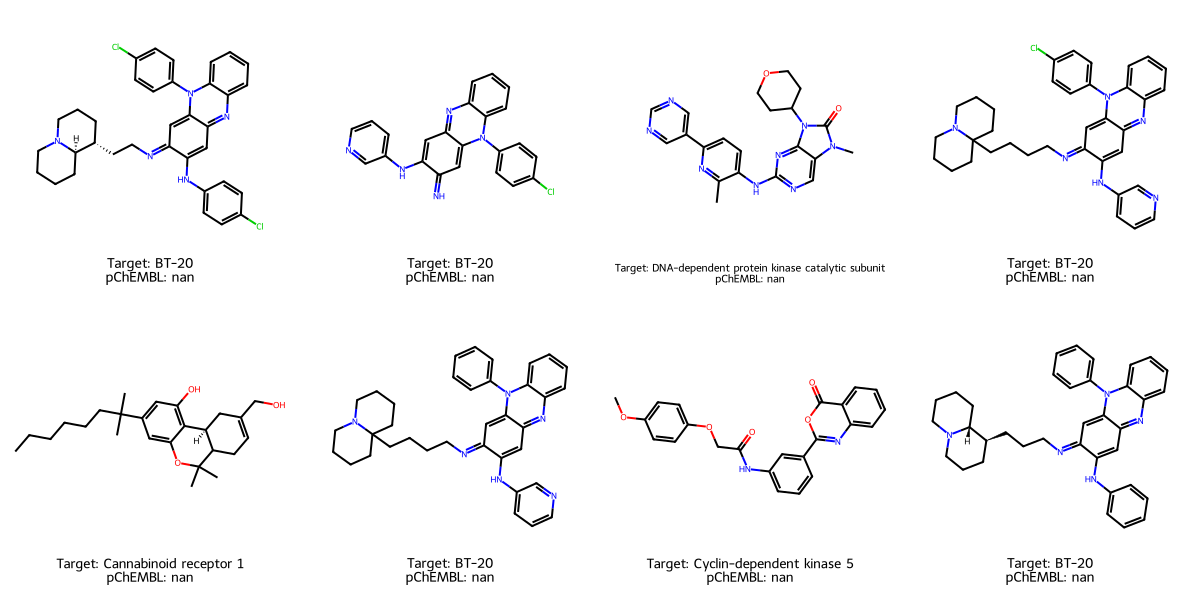

In [ ]:

# Wizualizacja struktur chemicznych (Top 8 najbardziej aktywnych)

# 1. Wybór 8 najbardziej aktywnych związków z poprawnym SMILES
top_compounds = (
    df.filter(pl.col("canonical_smiles").is_not_null() & pl.col("pIC50").is_not_null())
    .sort("pIC50", descending=True)
    .head(8)
)

# 2. Konwersja SMILES na obiekty RDKit Mol
mols = [Chem.MolFromSmiles(smi) for smi in top_compounds["canonical_smiles"]]

# 3. Przygotowanie podpisów (Legenda: Cel + wartość pIC50)
labels = [
    f"Target: {name}\npIC50: {val:.2f}" 
    for name, val in zip(top_compounds["target_name"], top_compounds["pIC50"])
]

# 4. Generowanie siatki obrazów
Draw.MolsToGridImage(
    mols, 
    molsPerRow=4, 
    subImgSize=(300, 300), 
    legends=labels
)

## Przestrzeń chemiczna (PCA lub t-SNE)

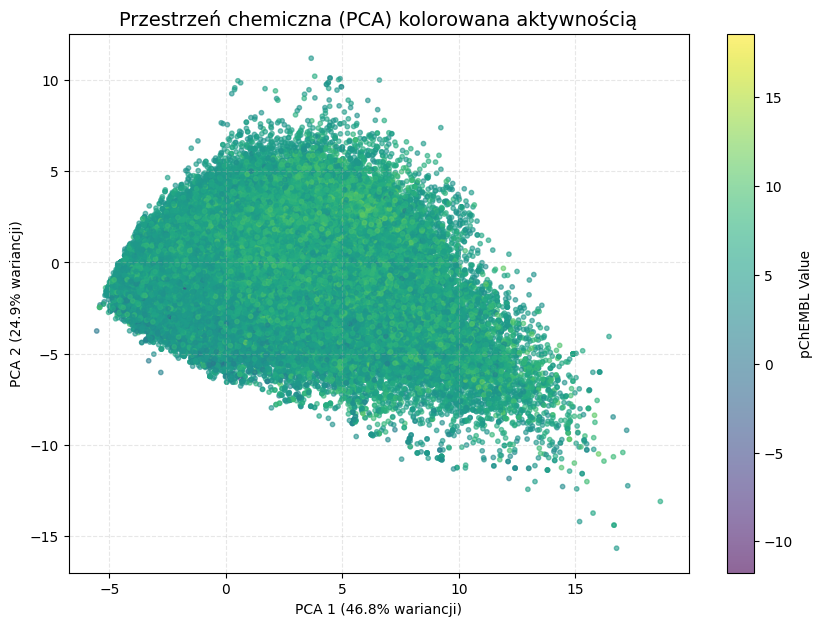

In [ ]:
# Analiza przestrzeni chemicznej (PCA)

# 1. Wybór cech do analizy i usunięcie wierszy z brakami danych
features = ["mw_freebase", "alogp", "hba", "hbd", "psa", "rtb", "aromatic_rings"]
pca_data = df.select(features + ["pIC50"]).drop_nulls()

# 2. Standaryzacja danych (PCA wymaga równej skali dla wszystkich cech)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(pca_data.select(features).to_pandas())

# 3. Wykonanie PCA (redukcja do 2 wymiarów)
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_features)

# 4. Dodanie wyników do ramki danych
plot_df = pca_data.to_pandas()
plot_df["PCA1"] = pca_results[:, 0]
plot_df["PCA2"] = pca_results[:, 1]

# 5. Wizualizacja
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    data=plot_df, 
    x="PCA1", y="PCA2", 
    c="pIC50", # Kolorowanie według aktywności
    cmap="viridis", 
    alpha=0.6, 
    s=10
)

plt.colorbar(scatter, label="pIC50 Value")
plt.title("Przestrzeń chemiczna (PCA) kolorowana aktywnością", fontsize=14)
plt.xlabel(f"PCA 1 ({pca.explained_variance_ratio_[0]:.1%} wariancji)")
plt.ylabel(f"PCA 2 ({pca.explained_variance_ratio_[1]:.1%} wariancji)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

## 4. Outlier Detection

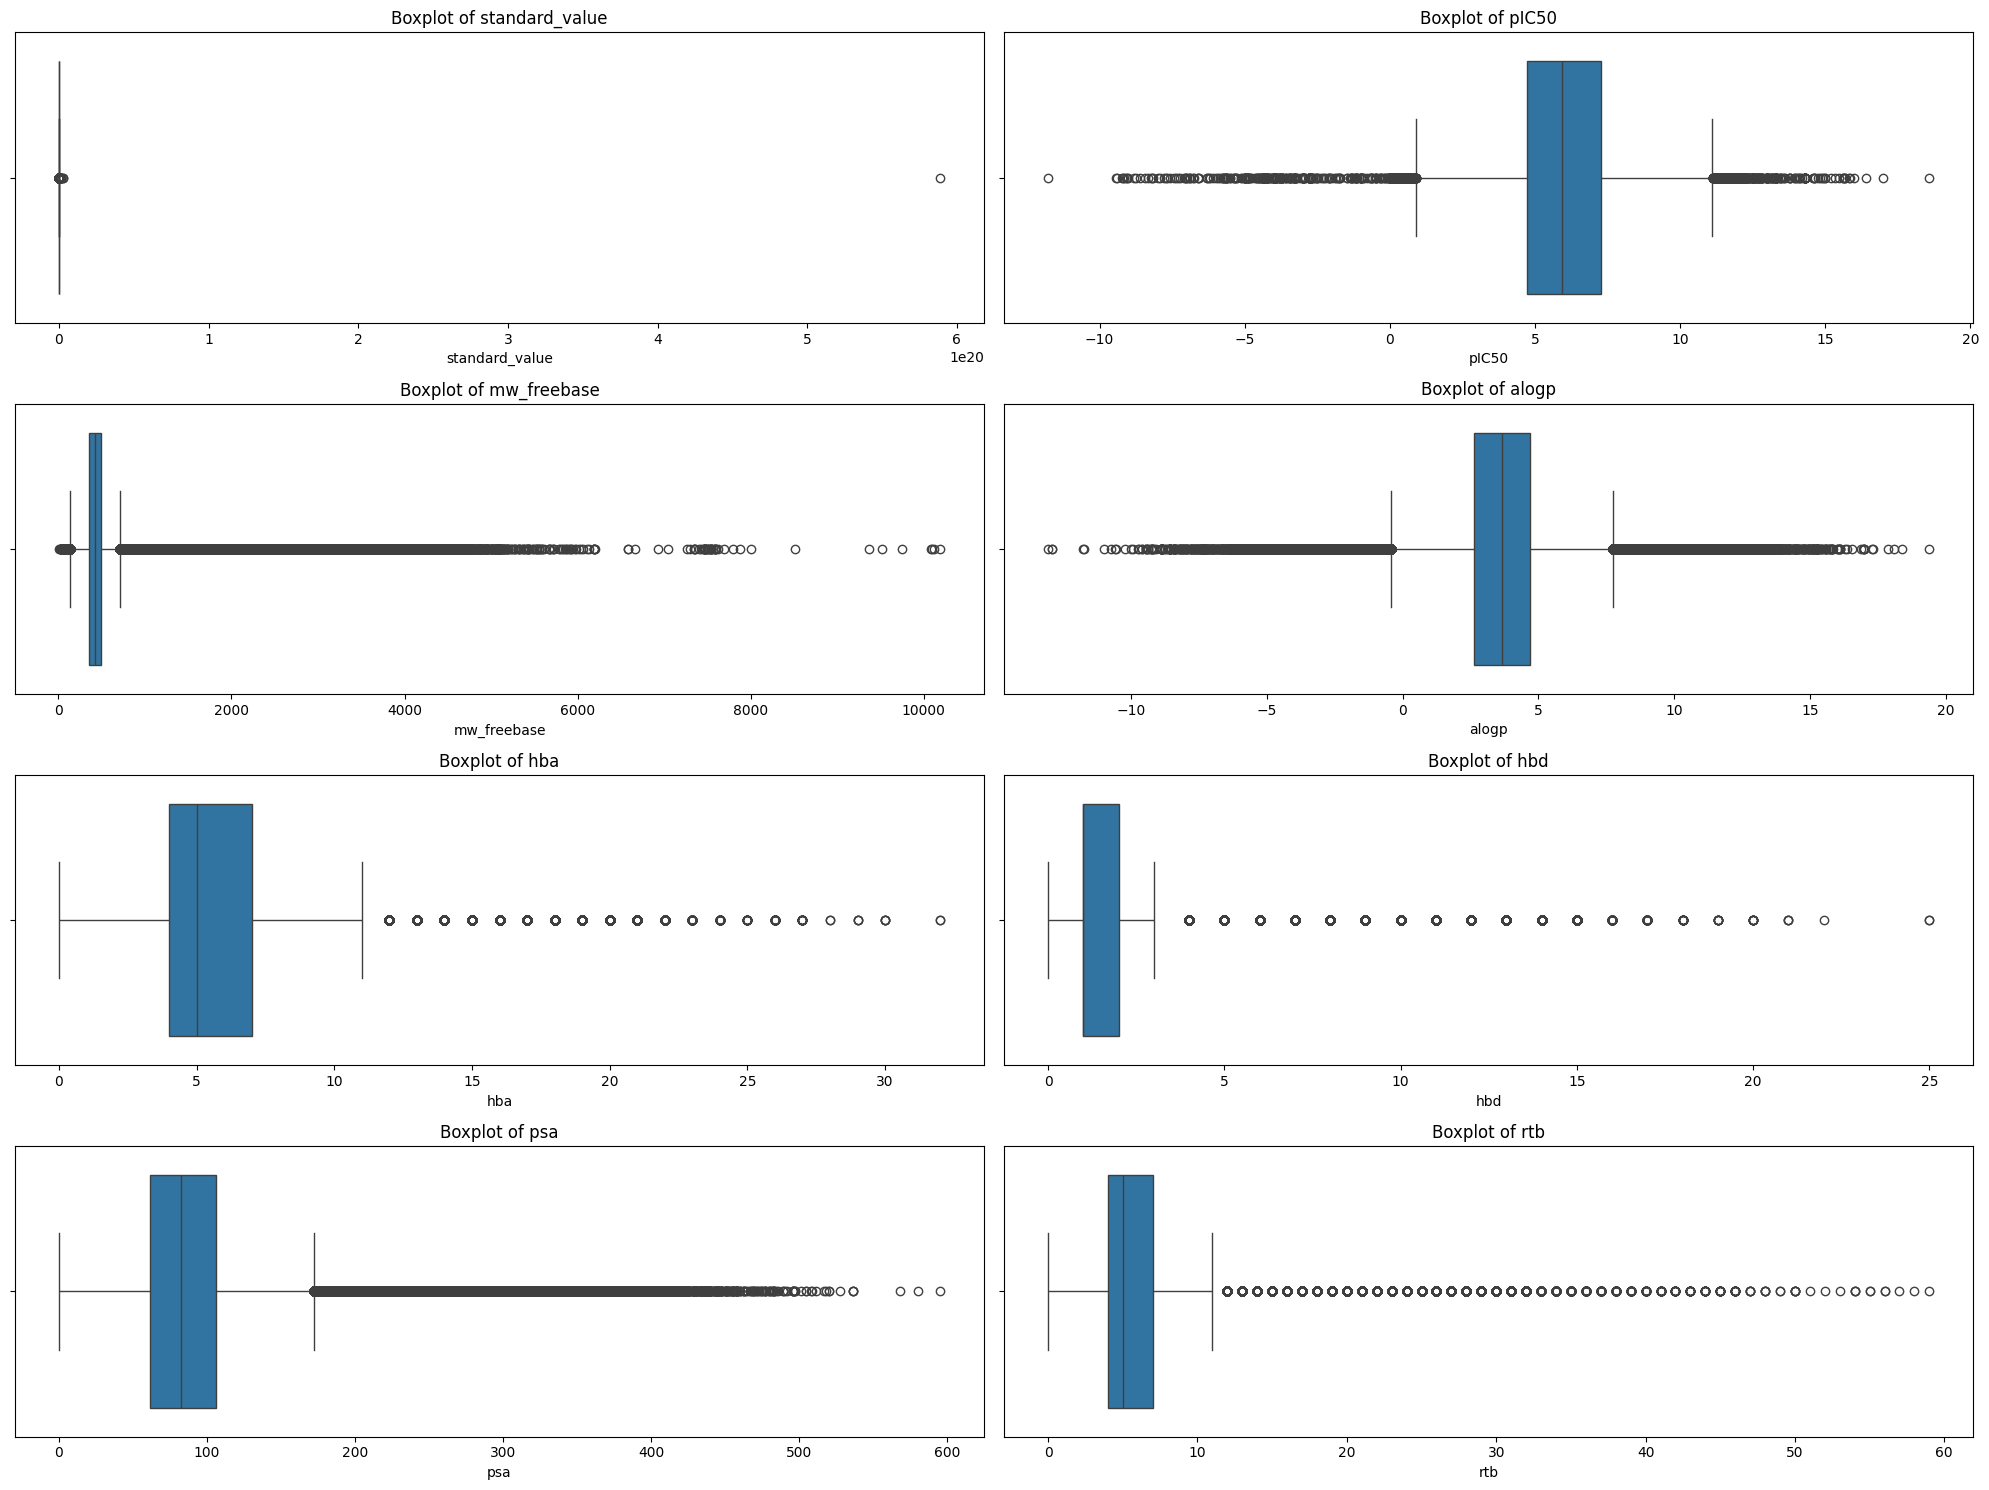

In [45]:
# Create boxplots for some key numerical columns to identify outliers
numerical_cols = ['standard_value', 'pIC50', 'mw_freebase', 'alogp', 'hba', 'hbd', 'psa', 'rtb']

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    if col in df.columns:
        plt.subplot(4, 2, i + 1)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

### **Komentarz do Outlier Detection (Wykrywanie Wartości Odstających)**

* **Ekstremalne wartości:** W kolumnie `standard_value` wykryto absurdalnie wysokie odczyty (max: `5.88e20`). To ewidentne błędy pomiarowe lub brak konwersji jednostek.
* **Wpływ na model:** Takie wartości całkowicie zrujnują każdy model regresji (średnia i odchylenie standardowe "eksplodują").
* **Rozwiązanie:**
    * **Filtracja:** Odrzucić wszystko powyżej rozsądnego progu bioaktywności np. $> 100,000 \text{ nM}$.
    * **Logarytmizacja:** Przekształcenie do skali logarytmicznej (pIC50), co naturalnie kompresuje outliery.


* **Uwaga na relacje:** Wiersze z `standard_relation` typu `>` lub `<` to technicznie też outliery (niepewne wartości), które należy traktować osobno.

## 5. Lipinski's Rule of Five Analysis

Lipinski Rule of Five Violations:
shape: (6, 2)
┌─────────────────────┬─────────┐
│ lipinski_violations ┆ count   │
│ ---                 ┆ ---     │
│ i8                  ┆ u32     │
╞═════════════════════╪═════════╡
│ null                ┆ 34079   │
│ 0                   ┆ 1129291 │
│ 1                   ┆ 331853  │
│ 2                   ┆ 184308  │
│ 3                   ┆ 18946   │
│ 4                   ┆ 504     │
└─────────────────────┴─────────┘


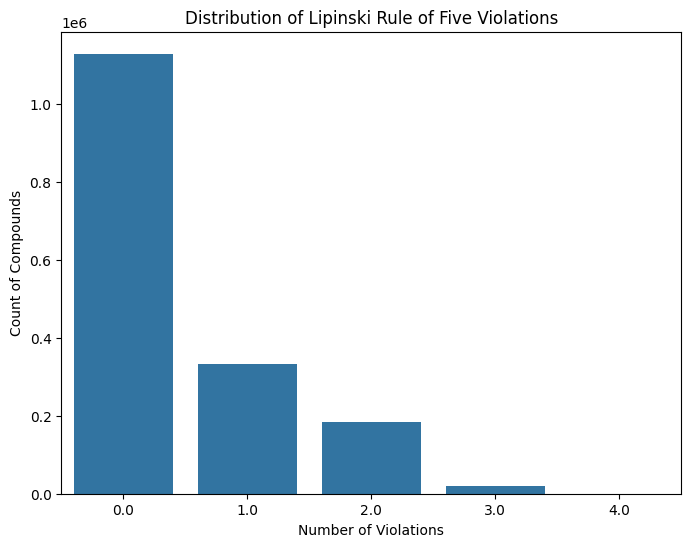

Percentage of drug-like compounds (0 or 1 violation): 86.00%


In [46]:
# 1. Tworzenie flag naruszeń (używamy with_columns zamiast przypisania w nawiasach)
lipinski_df = df.with_columns([
    (pl.col("mw_freebase") > 500).alias("mw_violation"),
    (pl.col("alogp") > 5).alias("logp_violation"),
    (pl.col("hbd") > 5).alias("hbd_violation"),
    (pl.col("hba") > 10).alias("hba_violation")
])

# 2. Obliczanie łącznej liczby naruszeń
lipinski_df = lipinski_df.with_columns(
    (pl.col("mw_violation").cast(pl.Int8) + 
     pl.col("logp_violation").cast(pl.Int8) + 
     pl.col("hbd_violation").cast(pl.Int8) + 
     pl.col("hba_violation").cast(pl.Int8)).alias("lipinski_violations")
)

# 3. Wyświetlenie statystyk
print('Lipinski Rule of Five Violations:')
print(lipinski_df["lipinski_violations"].value_counts().sort("lipinski_violations"))

# 4. Wykres (konwersja do Pandas tylko na potrzeby Seaborn)
plt.figure(figsize=(8, 6))
sns.countplot(x='lipinski_violations', data=lipinski_df.to_pandas())
plt.title('Distribution of Lipinski Rule of Five Violations')
plt.xlabel('Number of Violations')
plt.ylabel('Count of Compounds')
plt.show()

# 5. Obliczanie procentu związków "drug-like"
drug_like_count = lipinski_df.filter(pl.col("lipinski_violations") <= 1).shape[0]
total_compounds = lipinski_df.shape[0]
print(f'Percentage of drug-like compounds (0 or 1 violation): {drug_like_count/total_compounds:.2%}')

## Analiza jednostek i typów aktywności

/tmp/ipykernel_73857/1791993894.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=activity_types.to_pandas(), x="count", y="standard_type", ax=ax[0], palette="viridis")
/tmp/ipykernel_73857/1791993894.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=activity_units.to_pandas(), x="count", y="standard_units", ax=ax[1], palette="magma")
/tmp/ipykernel_73857/1791993894.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=activity_relations.to_pandas(), x="standard_relation", y="count", ax=ax[2], palette="rocket")


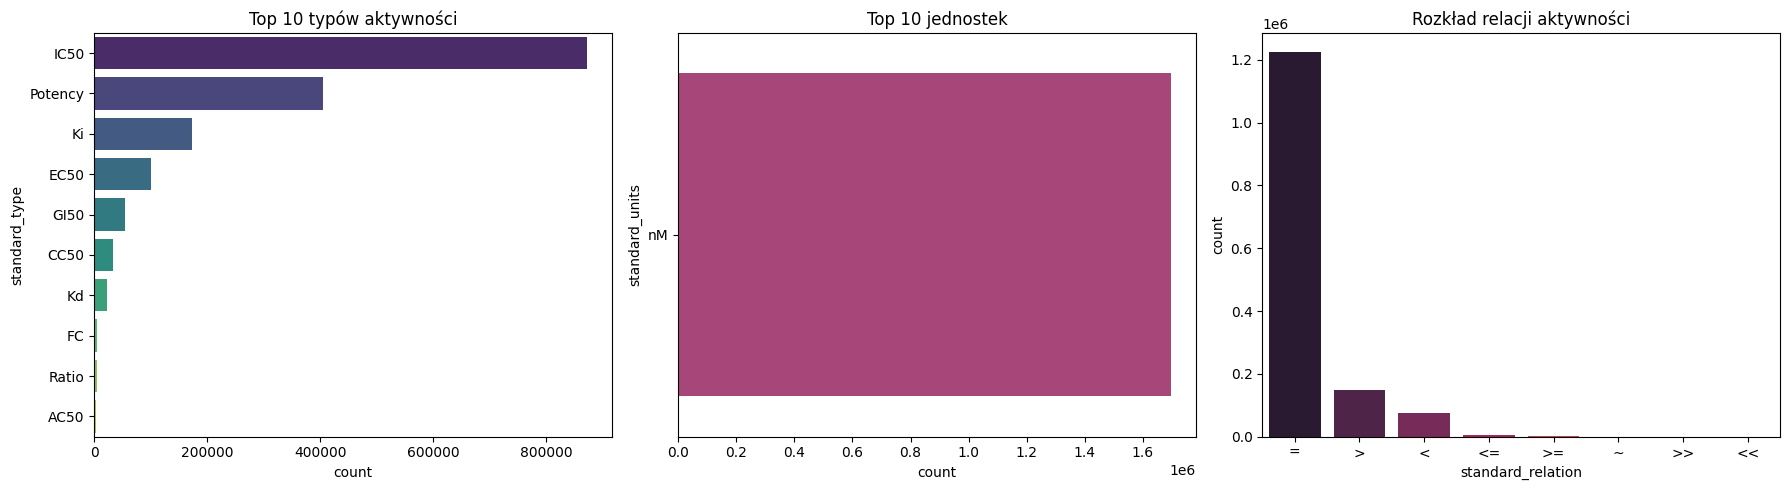

In [47]:

# 1. Przygotowanie zestawień
activity_types = df["standard_type"].value_counts().sort("count", descending=True).head(10)
activity_units = df["standard_units"].value_counts().sort("count", descending=True).head(10)
activity_relations = df["standard_relation"].value_counts().sort("count", descending=True)

# 2. Wizualizacja
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Wykres typów (IC50, Ki, itp.)
sns.barplot(data=activity_types.to_pandas(), x="count", y="standard_type", ax=ax[0], palette="viridis")
ax[0].set_title("Top 10 typów aktywności")

# Wykres jednostek (nM, uM, itp.)
sns.barplot(data=activity_units.to_pandas(), x="count", y="standard_units", ax=ax[1], palette="magma")
ax[1].set_title("Top 10 jednostek")

# Wykres relacji (=, >, <)
sns.barplot(data=activity_relations.to_pandas(), x="standard_relation", y="count", ax=ax[2], palette="rocket")
ax[2].set_title("Rozkład relacji aktywności")

plt.tight_layout()
plt.show()

**4. Wizualizacje (wnioski z kodu)**

* Kod sugeruje użycie wykresów słupkowych (`sns.barplot`) do analizy rozkładu typów aktywności (`standard_type`) oraz jednostek (`standard_units`).
* Widać dominację pewnych typów pomiarów (np. "Potency", "IC50"), ale też "śmieciowe" typy, które trzeba odsiać.

---

### **Pytania i Problemy (Sekcja Refleksji)**

**1. Co odkryto w danych?**

* Dane pochodzą z bardzo różnych eksperymentów – mamy mieszankę celów biologicznych (`target_chembl_id`).
* Istnieje wiele rekordów z bardzo wysokim `confidence_score` (średnia > 7), co jest dobrą wiadomością dla jakości modeli.

**2. Jakie problemy zauważono?**

* **Problem jednostek:** `standard_value` ma ogromną rozpiętość. Prawdopodobnie zmieszane są jednostki (nM, uM, M) – trzeba je ujednolicić do nM.
* **Problem relacji:** Jak traktować wyniki `> 10000 nM`? Czy to oznacza, że lek nie działa? (Zazwyczaj tak, ale dla modelu regresji to trudne dane).
* **Niespójność typów:** W `standard_type` mamy "IC50", "Potency", "% inhibition". Nie można ich porównywać 1:1.

**3. Jakie pytania się pojawiły?**

* Czy odrzucamy rekordy, gdzie `standard_relation` nie jest równe `=`?
* Jak uzupełnić braki w `alogp` – średnią, czy wyliczyć na nowo z `canonical_smiles` (biblioteka RDKit)?
* Czy `pIC50` w danych jest wiarygodne, czy lepiej przeliczyć je samemu ze `standard_value`?

---

### **II. Inżynieria cech**

**1. Transformacje**

* **Logarytmizacja:** Konwersja `standard_value` na skalę logarytmiczną (np. pIC50 = -log10(M)), aby zmniejszyć wpływ outlierów i dopasować do rozkładu normalnego.
* **Skalowanie:** Cechy takie jak `mw_freebase` (zakres 0-10000) i `alogp` (zakres -13 do 19) mają zupełnie inne skale. Konieczna standaryzacja (StandardScaler) przed wrzuceniem do modelu.
* **Kodowanie:** `target_chembl_id` musi zostać zakodowane (One-Hot lub Target Encoding), jeśli budujemy model ogólny (multitask).

**2. Nowe cechy (Feature Creation)**

* Wykorzystanie biblioteki **RDKit** (widocznej w imporcie `import rdkit`):
* **Fingerprinty molekularne:** (np. Morgan Fingerprints) – to standard w chemoinformatyce, zamienia strukturę 2D na wektor bitowy.
* **Deskryptory:** Liczba pierścieni, liczba wiązań obrotowych (już są w danych, ale można dodać więcej, np. QED).



**3. Braki wartości**

* **Strategia:**
* Jeśli brak `canonical_smiles` -> usuwamy (nie da się odzyskać struktury).
* Jeśli brak `pchembl_value` i `standard_value` -> usuwamy (brak etykiety do uczenia).
* Braki w `alogp`/`mw` -> można doliczyć RDKitem na podstawie SMILES.



**4. Ocena ważności cech**

* **Korelacja Pearsona:** Sprawdzenie liniowej zależności między cechami fizykochemicznymi a aktywnością.
* **Feature Importance z drzew:** Użycie Random Forest (lub XGBoost) do wskazania, które fragmenty fingerprintów są kluczowe dla aktywności.


* **Spostrzeżenia:**
* "Zbiór danych wymagał drastycznego filtrowania (usunięto X% danych z powodu braku jednostek)".
* "Istnieje silna korelacja między masą cząsteczkową a aktywnością dla tego celu biologicznego".